## Data Dive 3

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',3000)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings('ignore')

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_2448\22775148.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above


In [2]:
# import data sets
df_H = pd.read_csv(r"C:\Users\Katabatic\Desktop\Data 3500\Data Dive 3\WHRData2021 (1).csv", index_col =1, header = 0)
df_IQ = pd.read_csv(r"C:\Users\Katabatic\Desktop\Data 3500\Data Dive 3\IQ_level.csv", index_col = 3, header = 0)

In [3]:
# see what the happiness df looks like as far as columns to potentially merge
df_H.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 166 entries, 331002647.0 to 11193729.0
Data columns (total 16 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2019                                                              164 non-null    float64
 2   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 3   Median age                                                                   163 non-null    float64
 4   Island                                                                       166 non-null    int64  
 5   Index of exposure to COVID-19  infections in other countries as of March 31  164 non-null    float64
 6   Log of average distance

In [4]:
# same as above with IQ
df_IQ.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 108 entries, 1283.0 to 22.0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        108 non-null    int64  
 1   country     108 non-null    object 
 2   IQ          108 non-null    int64  
 3   avg_income  106 non-null    float64
 4   avg_temp    108 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.1+ KB


In [5]:
merged_df = df_IQ.merge(df_H, left_on='country', right_on='Country name', how='inner')

In [6]:
# print the combined to see how many rows we need to deal with as far as missing values
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 21 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   rank                                                                         96 non-null     int64  
 1   country                                                                      96 non-null     object 
 2   IQ                                                                           96 non-null     int64  
 3   avg_income                                                                   96 non-null     float64
 4   avg_temp                                                                     96 non-null     float64
 5   Country name                                                                 96 non-null     object 
 6   Population 2019                             

In [7]:
# we have two columns of country, so let's drop one
merged_df = merged_df.drop(['Country name'], axis = 1)


In [8]:
merged_df.head(20)

,rank,country,IQ,avg_income,avg_temp,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,2,Japan,106,40964.0,19.2,1.262649e+08,2.603,48.2,1,0.863,8.390,1,0,0.317,33.90,1340567.0,1362470.0,1387775.0,1376426.0,10.146
1,3,Singapore,106,41100.0,31.5,5.703569e+06,0.496,42.4,1,1.260,8.426,1,1,0.869,45.20,20905.0,21282.0,21446.0,22000.0,13.658
2,5,China,104,4654.0,19.1,1.397715e+09,0.332,38.7,0,1.097,8.213,1,0,0.516,46.70,NaN,NaN,NaN,NaN,NaN
3,6,South Korea,103,22805.0,18.2,5.170910e+07,1.789,43.4,0,1.607,8.228,1,0,0.112,35.50,284548.0,298030.0,294080.0,308318.0,31.266
4,7,Netherlands,101,45337.0,14.4,1.733285e+07,67.260,43.2,0,5.574,9.060,0,0,0.522,27.00,149805.0,152991.0,151547.0,171175.0,114.468
5,8,Finland,101,42706.0,8.2,5.520314e+06,10.125,42.8,0,2.225,8.927,0,1,0.550,25.90,53546.0,54394.0,53821.0,55663.0,31.510
6,9,Canada,100,40207.0,7.4,3.758926e+07,41.418,41.4,0,2.296,9.268,0,0,0.482,35.25,NaN,NaN,NaN,NaN,NaN
7,11,Luxembourg,100,71296.0,14.7,6.198960e+05,79.076,39.7,0,5.974,9.070,0,0,0.595,30.90,4251.0,4300.0,4288.0,4706.0,68.439
8,13,Germany,100,39911.0,13.8,8.313280e+07,40.331,46.6,0,4.838,9.018,0,1,0.435,31.10,929351.0,952295.0,936772.0,1000855.0,73.548
9,14,Switzerland,100,70399.0,15.2,8.574832e+06,88.334,43.1,0,5.584,9.078,0,0,0.660,30.10,66703.0,66888.0,67515.0,77087.0,116.680


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   rank                                                                         96 non-null     int64  
 1   country                                                                      96 non-null     object 
 2   IQ                                                                           96 non-null     int64  
 3   avg_income                                                                   96 non-null     float64
 4   avg_temp                                                                     96 non-null     float64
 5   Population 2019                                                              96 non-null     float64
 6   COVID-19 deaths per 100,000 population in 20

As we can see, I have some columns with nulls that will need to be addressed.

In [10]:

country_list = merged_df['country'].unique()  # Or merged_df['country'].unique() if 'country' is used in the merged DataFrame
print(country_list)

['Japan' 'Singapore' 'China' 'South Korea' 'Netherlands' 'Finland'
 'Canada' 'Luxembourg' 'Germany' 'Switzerland' 'Estonia' 'Australia'
 'United Kingdom' 'Iceland' 'Austria' 'Hungary' 'New Zealand' 'Belgium'
 'Norway' 'Sweden' 'Denmark' 'Cambodia' 'France' 'United States' 'Poland'
 'Russia' 'Spain' 'Ireland' 'Italy' 'Croatia' 'Lithuania' 'Israel'
 'Mongolia' 'Portugal' 'Bulgaria' 'Greece' 'Ukraine' 'Vietnam'
 'Kazakhstan' 'Malaysia' 'Myanmar' 'Thailand' 'Serbia' 'Chile'
 'Costa Rica' 'Iraq' 'Romania' 'Argentina' 'Mauritius' 'Mexico' 'Turkey'
 'Georgia' 'Sri Lanka' 'Montenegro' 'Cuba' 'Brazil' 'Philippines'
 'Colombia' 'Laos' 'Venezuela' 'Albania' 'United Arab Emirates'
 'Dominican Republic' 'Afghanistan' 'Iran' 'Pakistan' 'Indonesia' 'Kuwait'
 'Oman' 'Qatar' 'Bolivia' 'Ecuador' 'Egypt' 'Algeria' 'India'
 'Saudi Arabia' 'Sudan' 'Syria' 'Bangladesh' 'Chad' 'Kenya' 'Zimbabwe'
 'El Salvador' 'Morocco' 'South Africa' 'Niger' 'Somalia' 'Nigeria'
 'Ethiopia' 'Cameroon' 'Ghana' 'Ivory Coast' '

I could have done a loop for the four blocks below, but it just wasn't going. 

In [11]:
# fill in the all cause death count 2017 with average
average_ratio_2017 = (merged_df['All-cause death count, 2017'] / merged_df['Population 2019']).mean()
missing_data = merged_df['All-cause death count, 2017'].isna()

# Fill in missing values using the calculated average ratio
merged_df.loc[missing_data, 'All-cause death count, 2017'] = merged_df.loc[missing_data, 'Population 2019'] * average_ratio_2017

In [12]:
# fill in the all cause death count 2017 with average
average_ratio_2018 = (merged_df['All-cause death count, 2018'] / merged_df['Population 2019']).mean()
missing_data = merged_df['All-cause death count, 2018'].isna()

# Fill in missing values using the calculated average ratio
merged_df.loc[missing_data, 'All-cause death count, 2018'] = merged_df.loc[missing_data, 'Population 2019'] * average_ratio_2017

In [13]:
# fill in the all cause death count 2017 with average
average_ratio_2019 = (merged_df['All-cause death count, 2019'] / merged_df['Population 2019']).mean()
missing_data = merged_df['All-cause death count, 2019'].isna()

# Fill in missing values using the calculated average ratio
merged_df.loc[missing_data, 'All-cause death count, 2019'] = merged_df.loc[missing_data, 'Population 2019'] * average_ratio_2017

In [14]:
# fill in the all cause death count 2017 with average
average_ratio_2020 = (merged_df['All-cause death count, 2020'] / merged_df['Population 2019']).mean()
missing_data = merged_df['All-cause death count, 2020'].isna()

# Fill in missing values using the calculated average ratio
merged_df.loc[missing_data, 'All-cause death count, 2020'] = merged_df.loc[missing_data, 'Population 2019'] * average_ratio_2017

In [15]:
# now I need to do the same thing for excess deaths
excess_deaths_ratio = (merged_df['Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'] / merged_df['Population 2019']).mean()
missing_data = merged_df['Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'].isna()

# Fill in missing values using the calculated average ratio
merged_df.loc[missing_data, 'Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'] = merged_df.loc[missing_data, 'Population 2019'] * excess_deaths_ratio

In [16]:
#make sure all the values are there again
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   rank                                                                         96 non-null     int64  
 1   country                                                                      96 non-null     object 
 2   IQ                                                                           96 non-null     int64  
 3   avg_income                                                                   96 non-null     float64
 4   avg_temp                                                                     96 non-null     float64
 5   Population 2019                                                              96 non-null     float64
 6   COVID-19 deaths per 100,000 population in 20

In [17]:
# making sure the values make sense that were put in.
merged_df.head(20)

,rank,country,IQ,avg_income,avg_temp,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,2,Japan,106,40964.0,19.2,1.262649e+08,2.603,48.2,1,0.863,8.390,1,0,0.317,33.90,1.340567e+06,1.362470e+06,1.387775e+06,1.376426e+06,10.146000
1,3,Singapore,106,41100.0,31.5,5.703569e+06,0.496,42.4,1,1.260,8.426,1,1,0.869,45.20,2.090500e+04,2.128200e+04,2.144600e+04,2.200000e+04,13.658000
2,5,China,104,4654.0,19.1,1.397715e+09,0.332,38.7,0,1.097,8.213,1,0,0.516,46.70,1.180235e+07,1.180235e+07,1.180235e+07,1.180235e+07,17702.166493
3,6,South Korea,103,22805.0,18.2,5.170910e+07,1.789,43.4,0,1.607,8.228,1,0,0.112,35.50,2.845480e+05,2.980300e+05,2.940800e+05,3.083180e+05,31.266000
4,7,Netherlands,101,45337.0,14.4,1.733285e+07,67.260,43.2,0,5.574,9.060,0,0,0.522,27.00,1.498050e+05,1.529910e+05,1.515470e+05,1.711750e+05,114.468000
5,8,Finland,101,42706.0,8.2,5.520314e+06,10.125,42.8,0,2.225,8.927,0,1,0.550,25.90,5.354600e+04,5.439400e+04,5.382100e+04,5.566300e+04,31.510000
6,9,Canada,100,40207.0,7.4,3.758926e+07,41.418,41.4,0,2.296,9.268,0,0,0.482,35.25,3.174050e+05,3.174050e+05,3.174050e+05,3.174050e+05,476.070854
7,11,Luxembourg,100,71296.0,14.7,6.198960e+05,79.076,39.7,0,5.974,9.070,0,0,0.595,30.90,4.251000e+03,4.300000e+03,4.288000e+03,4.706000e+03,68.439000
8,13,Germany,100,39911.0,13.8,8.313280e+07,40.331,46.6,0,4.838,9.018,0,1,0.435,31.10,9.293510e+05,9.522950e+05,9.367720e+05,1.000855e+06,73.548000
9,14,Switzerland,100,70399.0,15.2,8.574832e+06,88.334,43.1,0,5.584,9.078,0,0,0.660,30.10,6.670300e+04,6.688800e+04,6.751500e+04,7.708700e+04,116.680000


In [20]:
# reset the rankings since we lost countries in the 
merged_df['rank'] = merged_df['rank'].rank(ascending=False, method='min').astype(int)
merged_df.head()

,rank,country,IQ,avg_income,avg_temp,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,1,Japan,106,40964.0,19.2,1.262649e+08,2.603,48.2,1,0.863,8.390,1,0,0.317,33.9,1.340567e+06,1.362470e+06,1.387775e+06,1.376426e+06,10.146000
1,2,Singapore,106,41100.0,31.5,5.703569e+06,0.496,42.4,1,1.260,8.426,1,1,0.869,45.2,2.090500e+04,2.128200e+04,2.144600e+04,2.200000e+04,13.658000
2,3,China,104,4654.0,19.1,1.397715e+09,0.332,38.7,0,1.097,8.213,1,0,0.516,46.7,1.180235e+07,1.180235e+07,1.180235e+07,1.180235e+07,17702.166493
3,4,South Korea,103,22805.0,18.2,5.170910e+07,1.789,43.4,0,1.607,8.228,1,0,0.112,35.5,2.845480e+05,2.980300e+05,2.940800e+05,3.083180e+05,31.266000
4,5,Netherlands,101,45337.0,14.4,1.733285e+07,67.260,43.2,0,5.574,9.060,0,0,0.522,27.0,1.498050e+05,1.529910e+05,1.515470e+05,1.711750e+05,114.468000


## Data merging and prepping is now done. EDA Now.
Bar plot of COVID Deaths vs Country

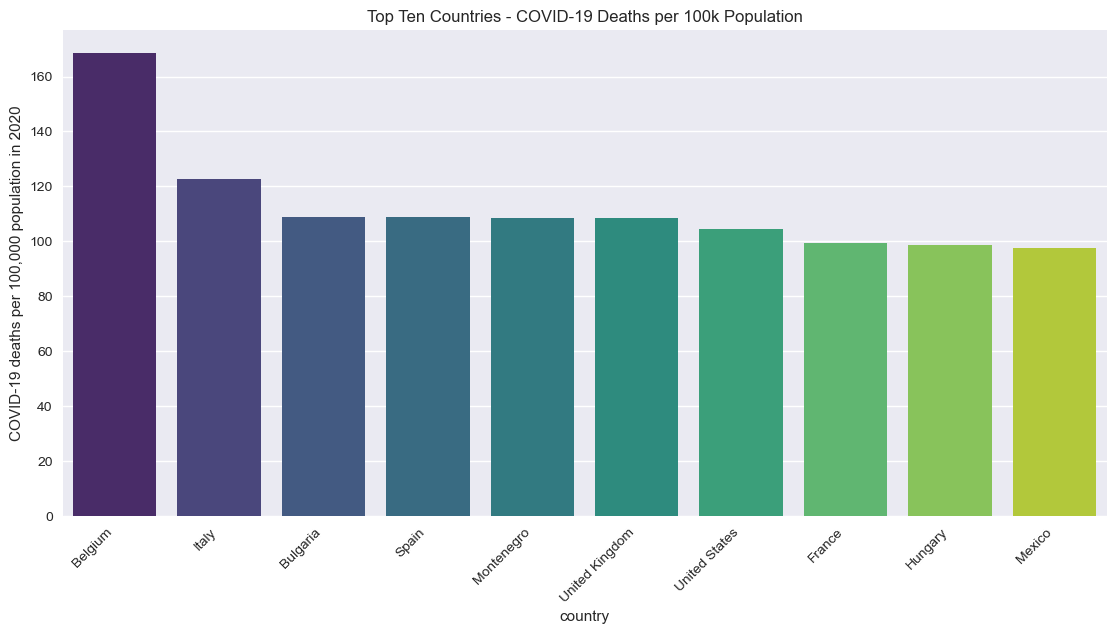

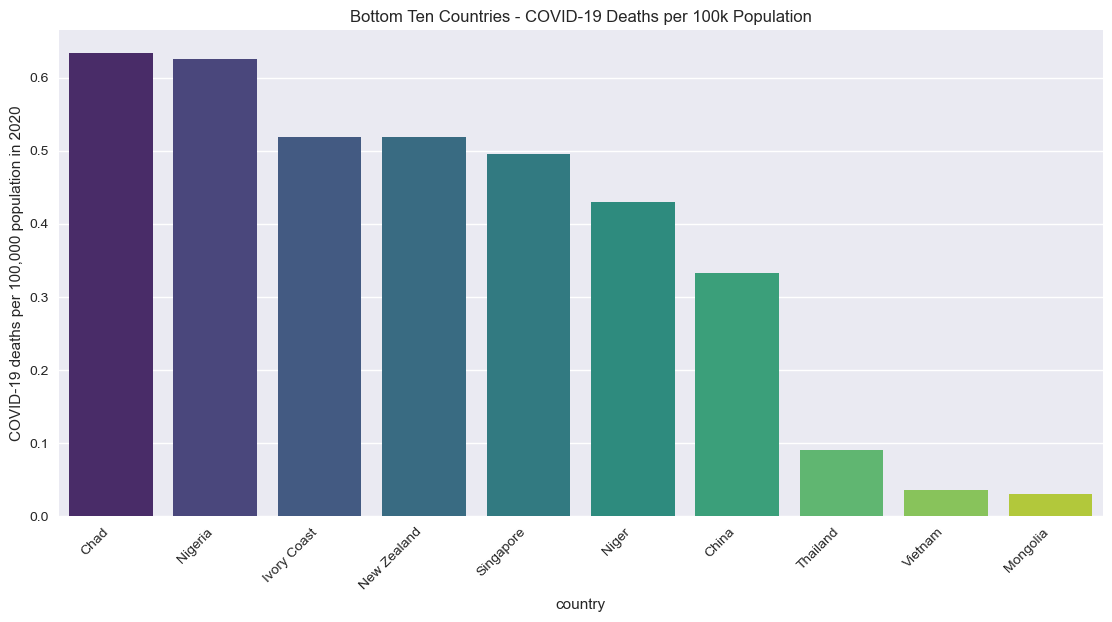

In [23]:
# Filter out rows where 'COVID-19 deaths per 100,000 population in 2020' is zero
filtered_df = merged_df[merged_df['COVID-19 deaths per 100,000 population in 2020'] != 0]

# Sort the filtered DataFrame by 'COVID-19 deaths per 100,000 population in 2020'
filtered_df_sorted = filtered_df.sort_values(by='COVID-19 deaths per 100,000 population in 2020', ascending=False)

# Extract the top and bottom ten rows
top_ten = filtered_df_sorted.head(10)
bottom_ten = filtered_df_sorted.tail(10)

# Plotting

# Top Ten
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='COVID-19 deaths per 100,000 population in 2020', data=top_ten, palette='viridis')
plt.title('Top Ten Countries - COVID-19 Deaths per 100k Population')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bottom Ten
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='COVID-19 deaths per 100,000 population in 2020', data=bottom_ten, palette='viridis')
plt.title('Bottom Ten Countries - COVID-19 Deaths per 100k Population')
plt.xticks(rotation=45, ha='right')
plt.show()

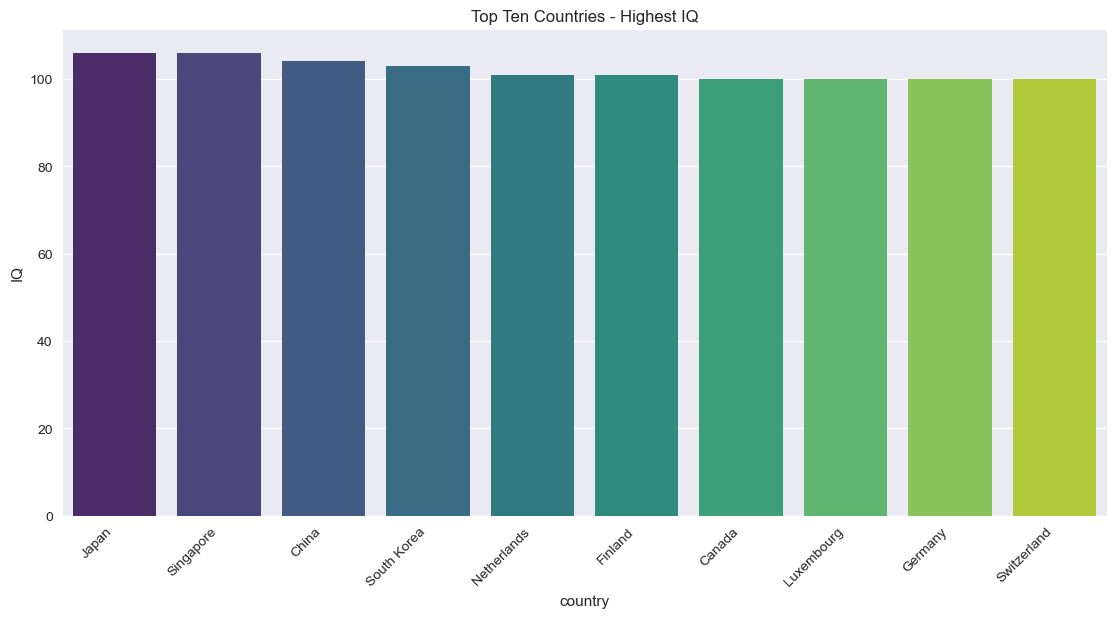

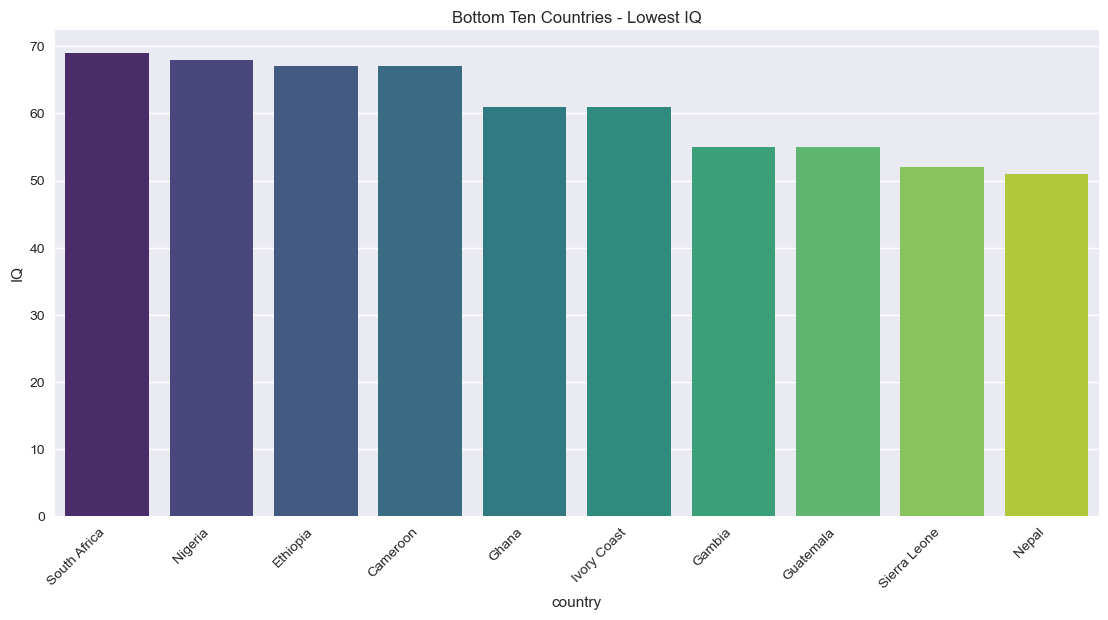

In [24]:
merged_df_sorted_iq = merged_df.sort_values(by='IQ', ascending=False)

# Extract the top and bottom ten rows
top_ten_iq = merged_df_sorted_iq.head(10)
bottom_ten_iq = merged_df_sorted_iq.tail(10)

# Plotting

# Top Ten
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='IQ', data=top_ten_iq, palette='viridis')
plt.title('Top Ten Countries - Highest IQ')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bottom Ten
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='IQ', data=bottom_ten_iq, palette='viridis')
plt.title('Bottom Ten Countries - Lowest IQ')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_2448\3099716038.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


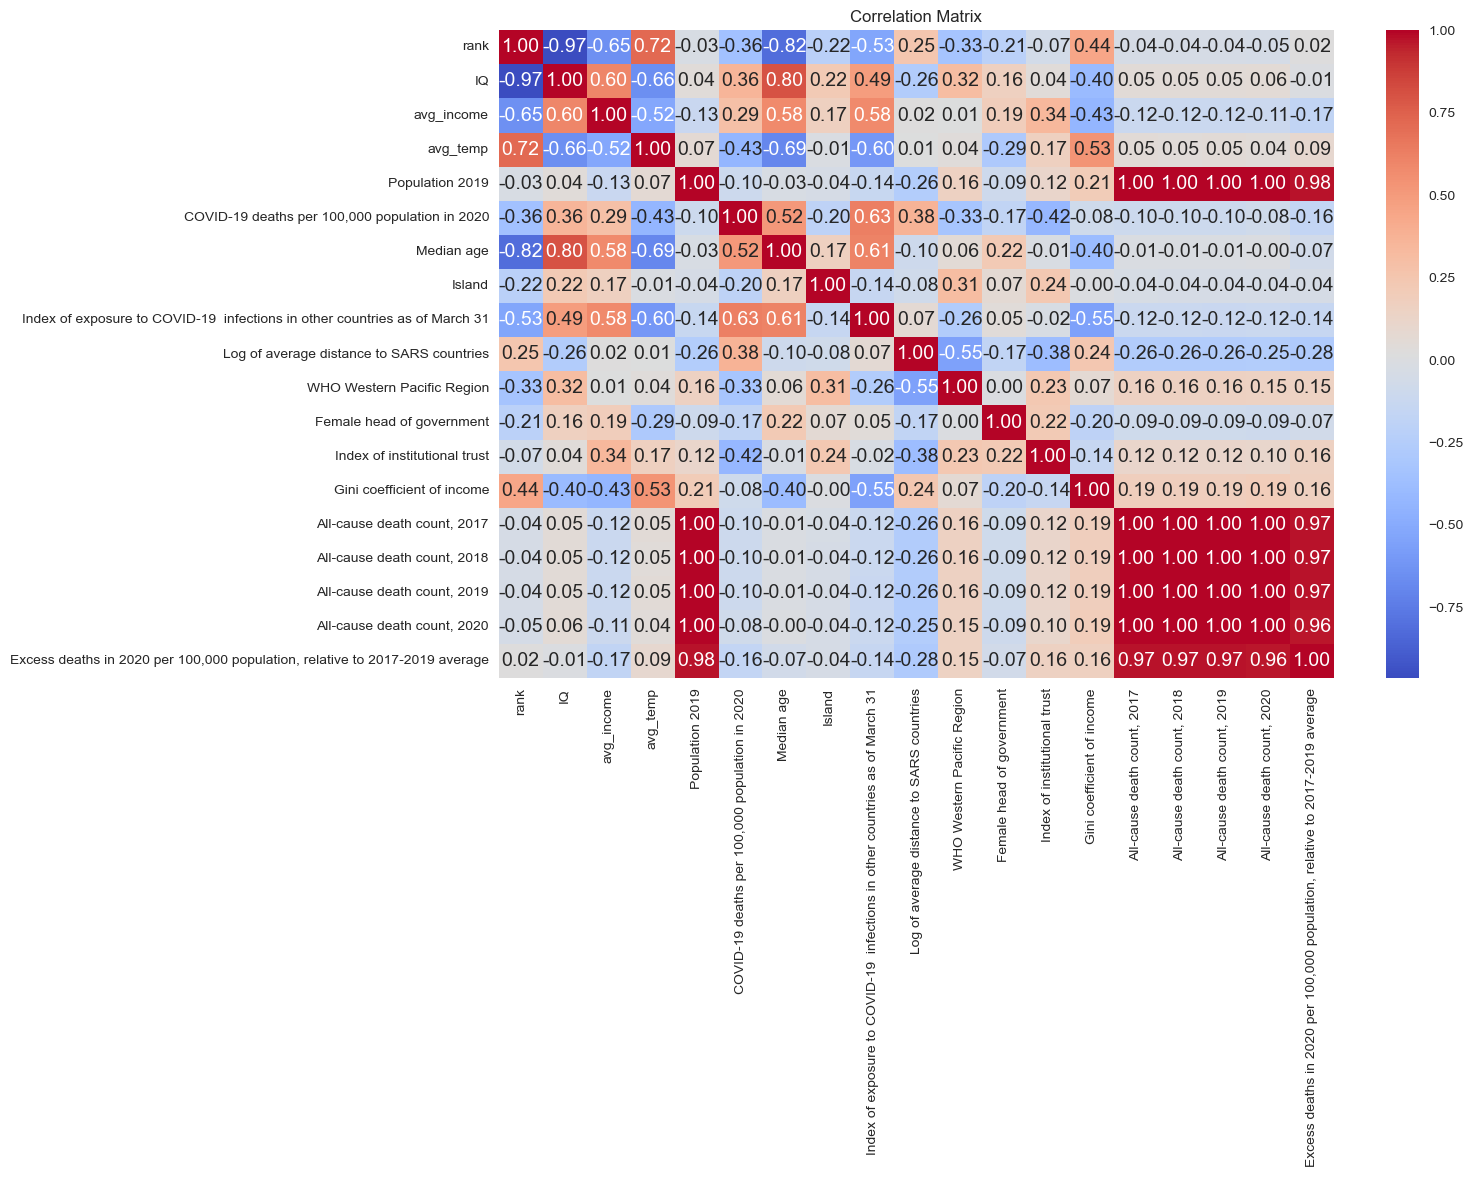

In [26]:
corr_matrix = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

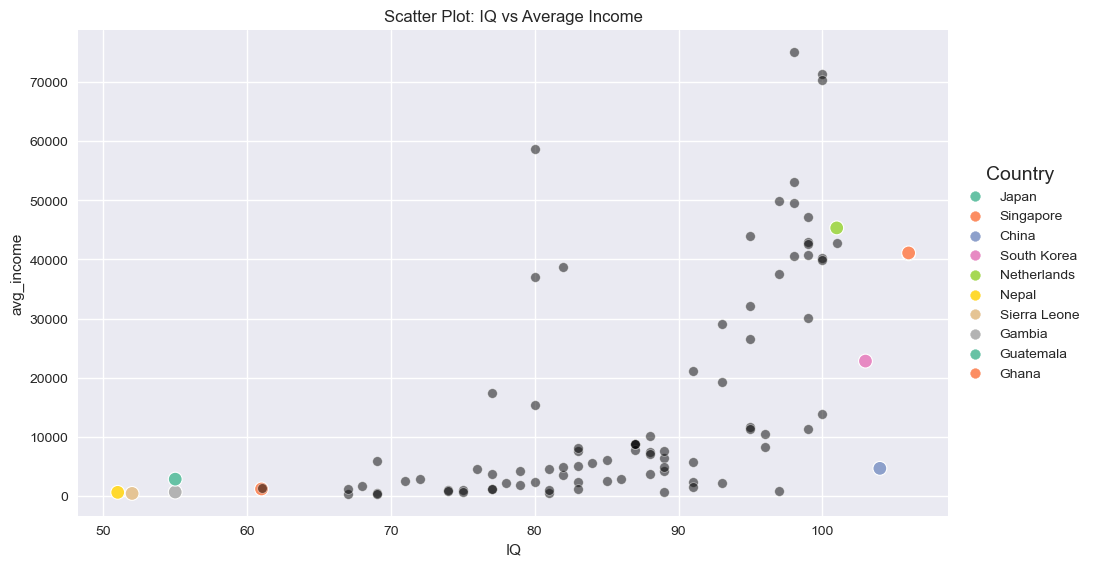

In [31]:
# Identify top few (e.g., top 5), bottom few (e.g., bottom 5), and outliers
top_few = merged_df.nlargest(5, 'IQ')
bottom_few = merged_df.nsmallest(5, 'IQ')

# Define a threshold for outliers (customize as needed)
outlier_threshold = 140

# Select countries with IQ above the threshold as outliers
outliers = merged_df[merged_df['IQ'] > outlier_threshold]

# Combine the selected dataframes
selected_df = pd.concat([top_few, bottom_few, outliers])

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for selected countries
scatter_plot_selected = sns.scatterplot(x='IQ', y='avg_income', data=selected_df, hue='country', palette='Set2', s=100)
# Scatter plot for other countries (black dots)
sns.scatterplot(x='IQ', y='avg_income', data=merged_df[~merged_df.index.isin(selected_df.index)], color='black', alpha=0.5)

plt.title('Scatter Plot: IQ vs Average Income')

# Customize legend for selected countries
scatter_plot_selected.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Country')

plt.show()

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_2448\3489276595.py:6: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  scatter_plot = sns.scatterplot(x='Gini coefficient of income', y='avg_income', data=selected_df_gini, hue='country', palette=larger_palette, s=100)


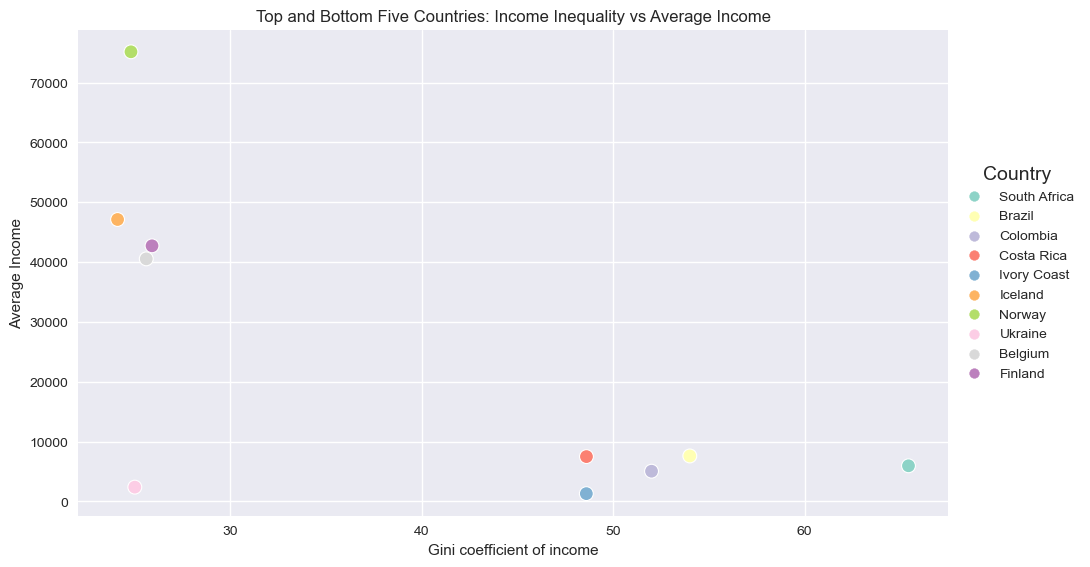

In [42]:
# Use a larger color palette for distinction
larger_palette = sns.color_palette("Set3", 12)

# Update the hue parameter with the larger color palette
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Gini coefficient of income', y='avg_income', data=selected_df_gini, hue='country', palette=larger_palette, s=100)

# Customize legend
scatter_plot.get_legend().set_title('Country')

plt.title('Top and Bottom Five Countries: Income Inequality vs Average Income')
plt.xlabel('Gini coefficient of income')
plt.ylabel('Average Income')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Country')
plt.show()

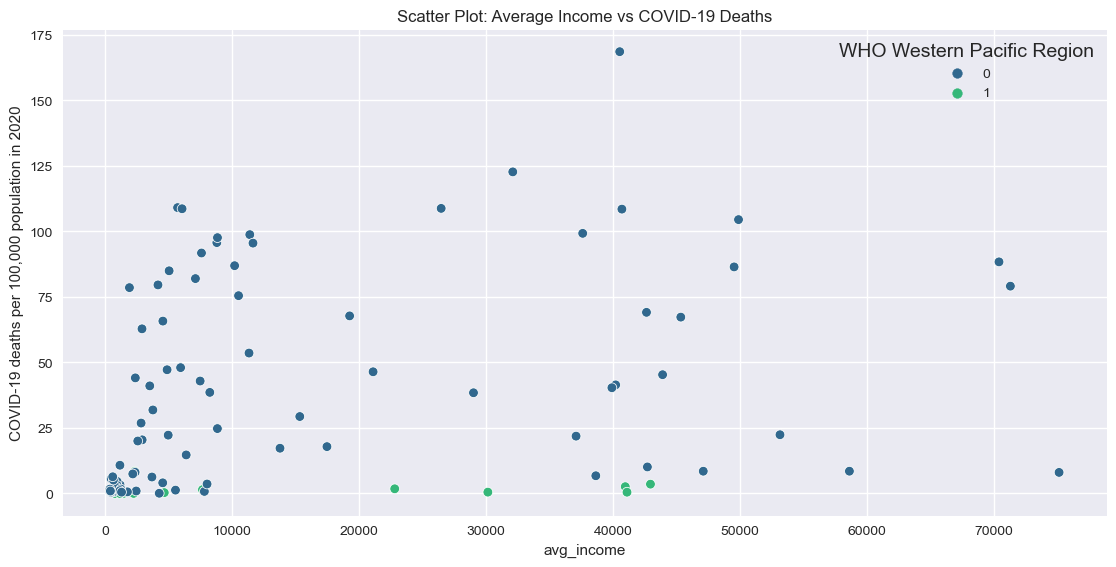

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_income', y='COVID-19 deaths per 100,000 population in 2020', data=merged_df, hue='WHO Western Pacific Region', palette='viridis')
plt.title('Scatter Plot: Average Income vs COVID-19 Deaths')
plt.show()

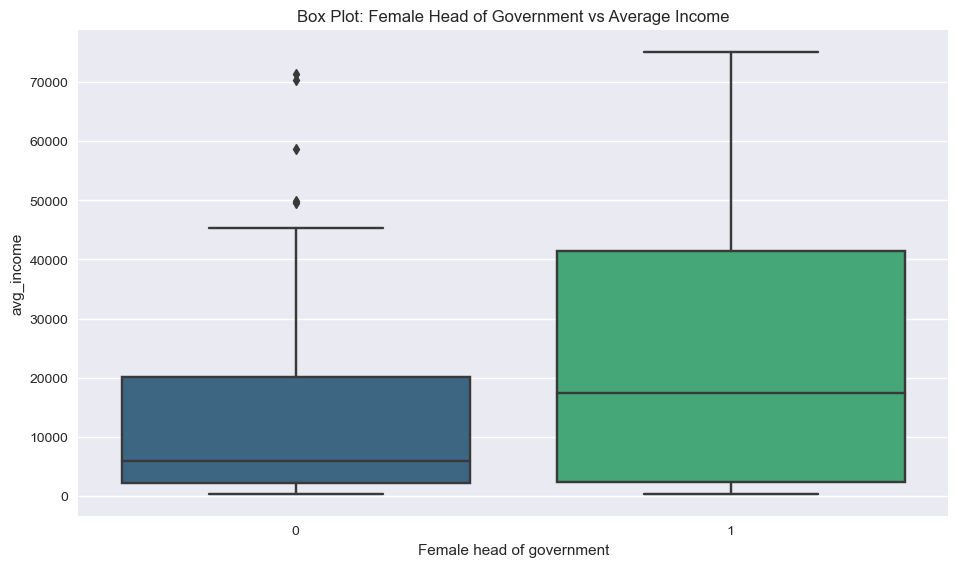

In [45]:
# Box plot: Female head of government vs Average Income
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='Female head of government', y='avg_income', data=merged_df, palette='viridis')
plt.title('Box Plot: Female Head of Government vs Average Income')

plt.show()

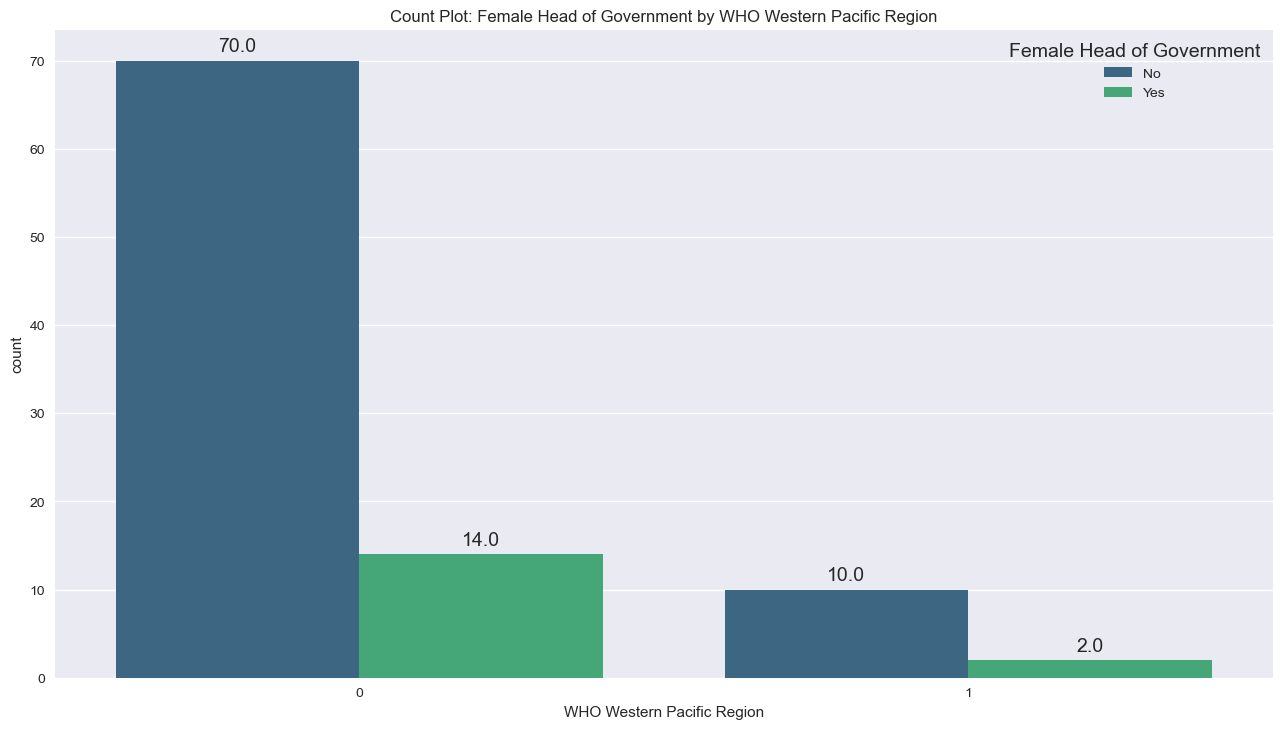

In [49]:
# Count plot: Female head of government by Region with annotations
plt.figure(figsize=(14, 8))
count_plot = sns.countplot(x='WHO Western Pacific Region', hue='Female head of government', data=merged_df, palette='viridis')

# Add annotations for each bar
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize legend
count_plot.legend(title='Female Head of Government', labels=['No', 'Yes'])

plt.title('Count Plot: Female Head of Government by WHO Western Pacific Region')
plt.show()

## Logistic Model

In [19]:
merged_df['Female head of government'] = merged_df['Female head of government'].astype(int)

# Select predictor variables and target variable
X = merged_df[['Median age', 'IQ', 'avg_income', 'avg_temp']]
y = merged_df['Female head of government']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print model evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
coefficients = model.coef_[0]
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Median age: 0.0180396038158676
IQ: -0.018161813872045615
avg_income: 1.859543225789347e-05
avg_temp: -0.04594789428676889


In [21]:
confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[16  0]
 [ 4  0]]


# Ridge Regression Now

In [22]:
# create dummy variables for the country column
merged_df = pd.get_dummies(merged_df, columns=['country'], drop_first=True)

In [23]:
# scale the data
# import scaling libraries and assign to variables

from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()


# Define your target variable (y) and independent variables (X)
y = merged_df['avg_income']
X = merged_df.drop(['avg_income'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the data i.e calculate the mean and sd of each coluns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)


iteration 0.001 done
iteration 0.1 done
iteration 0.5 done
iteration 1 done


C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.071e+06, tolerance: 2.551e+06
  model = cd_fast.enet_coordinate_descent(


<Figure size 2000x1000 with 0 Axes>

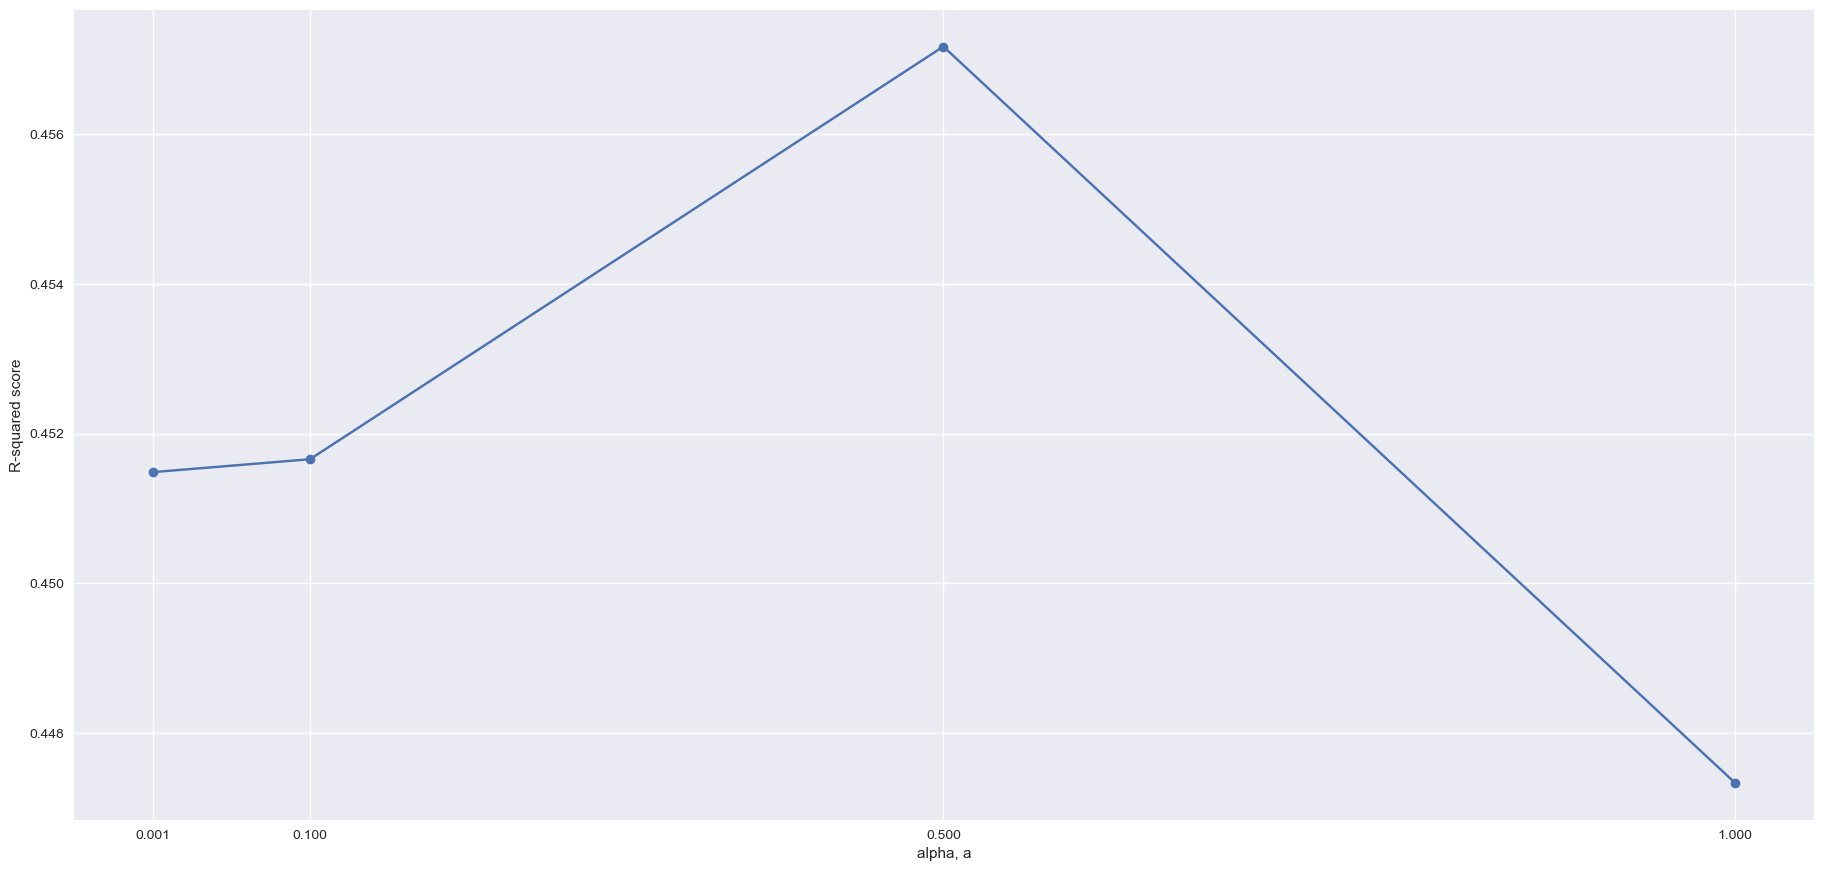

In [24]:
#messed with the alpha list to figure out where the best alpha is close to. Looks to be smaller
plt.figure(figsize=(20,10))


plt.figure(figsize=(20, 10))

alphas = [.001, .1, .5, 1 ]
scores = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train_sc, y_train)  # Fit the Lasso model
    score = lasso.score(X_test_sc, y_test)  # Calculate the R-squared score
    scores.append(score)
    print("iteration {} done".format(a))

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('R-squared score')
plt.xticks(alphas)
plt.show()

In [25]:
# Define technique to be used
reg_model = Ridge(fit_intercept=True, max_iter=3000)

# Define cross validation approach
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(.000001, .5, .005)

# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=cv, n_jobs=-1)
search_results = search.fit(X_train, y_train)

# Show "optimal" hyperparameter setting and performance measure
print('Best Ridge Regression Hyperparameter Setting from Grid Search')
print('Ridge Config: %s'   % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Ridge Regression Hyperparameter Setting from Grid Search
Ridge Config: {'alpha': 0.055001}
Best Value for Scoring Method: -1.74029


C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [26]:
# sets the properties for the ridge model based upon how many iterations we want and the best alpha value we found
ridge = Ridge(alpha=0.055, fit_intercept=True, max_iter=3000)

In [27]:
# fit the model
ridge.fit(X_train_sc, y_train)

Ridge(alpha=0.055, max_iter=3000)

In [28]:
# predict on test set with model
ridge_pred = ridge.predict(X_test_sc)

In [29]:
y_hat_test_sc = ridge_pred

#Lets calculate the MSE and RMSE from our test data
test_mse = mean_squared_error(y_test, y_hat_test_sc)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_sc)
test_r_squared = r2_score(y_test, y_hat_test_sc)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_sc)

In [30]:
print(f' the test MSE is:{test_mse}')
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAE is:{test_mae}')
print(f' the test Rsquared is:{test_r_squared}')
print(f' the test MAPE is:{test_mape}')

 the test MSE is:270575041.2084054
 the test RMSE is:16449.165365099998
 the test MAE is:11257.454920443379
 the test Rsquared is:0.41377326617707866
 the test MAPE is:1.3378767507432268


In [31]:
df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
display(df_ridge_pred.head())
df_ridge_pred.shape

,ridge_pred
0,2854.062920
1,6413.210710
2,13771.014609
3,-448.741739
4,24391.017330


(20, 1)

In [32]:


ridge_results = pd.DataFrame(y_test.reset_index())
df_lasso_pred = pd.DataFrame(ridge_pred)
ridge_results = pd.concat([ridge_results, df_ridge_pred], axis = 1)
ridge_results = ridge_results.rename(columns = {0:'lasso_pred'})
ridge_results.head()

,index,avg_income,ridge_pred
0,80,939.0,2854.062920
1,77,4532.0,6413.210710
2,73,3684.0,13771.014609
3,94,412.0,-448.741739
4,33,19253.0,24391.017330


In [33]:
ridge_results['ridge_resid'] = ridge_results['avg_income'] - ridge_results['ridge_pred']

df_results = ridge_results
df_results.head()

,index,avg_income,ridge_pred,ridge_resid
0,80,939.0,2854.062920,-1915.062920
1,77,4532.0,6413.210710,-1881.210710
2,73,3684.0,13771.014609,-10087.014609
3,94,412.0,-448.741739,860.741739
4,33,19253.0,24391.017330,-5138.017330


In [34]:
df_ridge = pd.DataFrame(ridge.coef_)
names = pd.DataFrame(list(X.columns))
df_ridge = pd.concat([names, df_ridge], axis = 1)
df_ridge.columns = ['Feature', 'ridge_coeff']
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending = False)
df_ridge

,Feature,ridge_coeff
69,country_Luxembourg,3561.411521
11,Index of institutional trust,3400.335163
109,country_United States,3380.470499
102,country_Switzerland,3339.128783
66,country_Kuwait,3135.090085
7,Index of exposure to COVID-19 infections in o...,3038.551269
107,country_United Arab Emirates,2747.290930
21,country_Australia,2656.507842
0,rank,2648.116016
101,country_Sweden,2248.808514


In [35]:
ridge.intercept_

14633.250000000004

In [36]:
df_results['ridge_resid_std'] = (df_results['ridge_resid'] - df_results['ridge_resid'].mean()) / df_results['ridge_resid'].std()

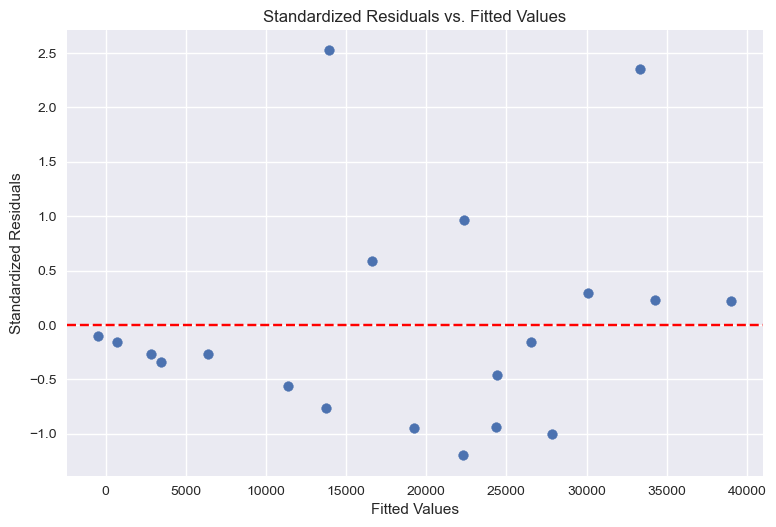

In [37]:
plt.scatter(df_results['ridge_pred'], df_results['ridge_resid_std'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Standardized Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

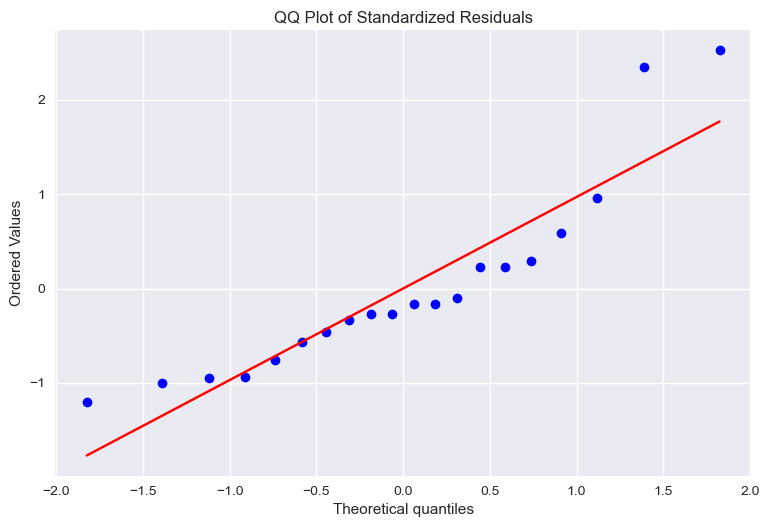

In [38]:
stats.probplot(df_results['ridge_resid_std'], dist="norm", plot=plt)
plt.title("QQ Plot of Standardized Residuals")
plt.show()